<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/8_6_Data_Visualization_Final_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Final Assessment**

In [1]:
# Installlibraries
!pip install folium
!pip install packaging
!pip install pandas dash
!pip3 install httpx==0.20 dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.0 MB/s eta 0:00:00


In [2]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
from dash import no_update
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

**Scenario**

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.

- recession period 1 - year 1980
- recession period 2 - year 1981 to 1982
- recession period 3 - year 1991
- recession period 4 - year 2000 to 2001
- recession period 5 - year end 2007 to mid 2009
- recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

**Importing Data**

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df=pd.read_csv(URL)
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.tail(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia
527,12/31/2023,2023,Dec,0,95.92,0.34,25240.425,2319,3,13.518,-1.064211,2.1,3538.5,Smallfamiliycar,Georgia


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

**1. Creating Visualizations for Data Analysis**


**TASK 1.1:** Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

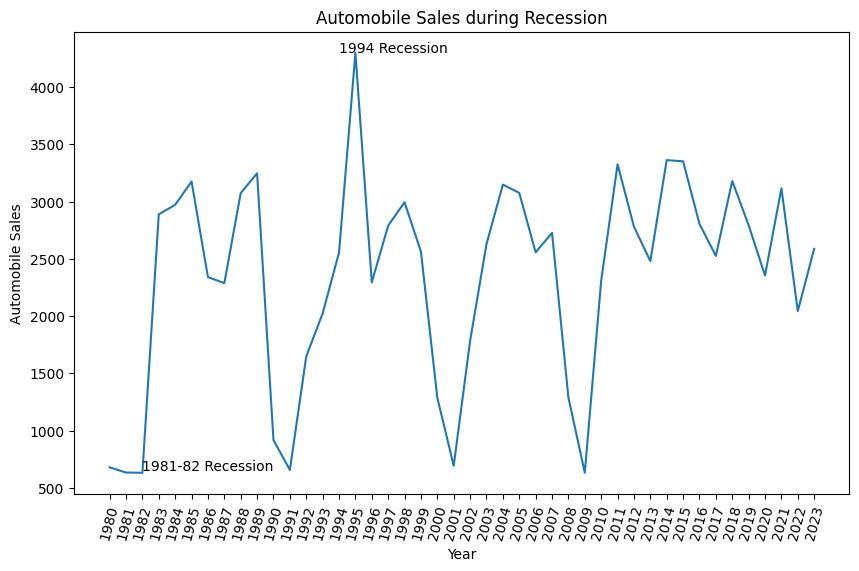

In [ ]:
df_line=df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xticks(list(range(1980,2024)), rotation=75)
plt.title("Automobile Sales during Recession")
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1994, 4300, '1994 Recession')
plt.show()


**TASK 1.2:** Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [ ]:
df_rec = df[df['Recession']==1]
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline= df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']

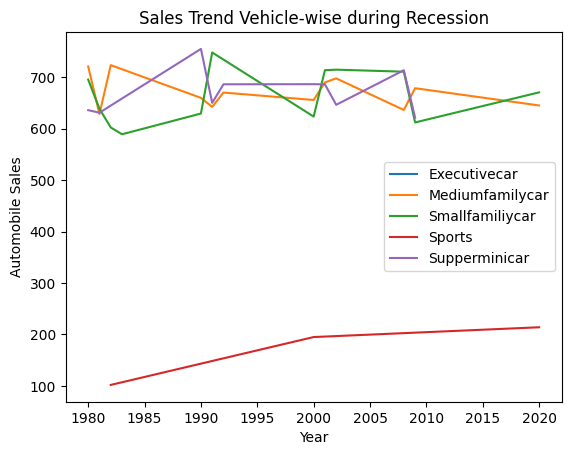

In [ ]:
df_Mline.plot(kind='line')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend()
plt.show()

Inference: From the graph, we see that, during the recession period, the sales for 'sport' type vehicles declined due to high cost of vehicle whereas the sales of 'small family cars' increased.

**TASK 1.3:** Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

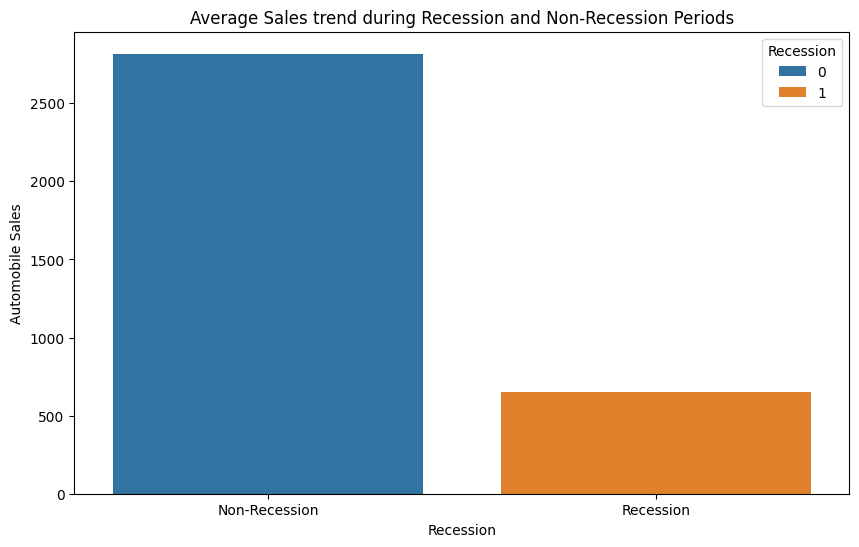

In [ ]:
df_new = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', data=df_new, hue='Recession')
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Sales trend during Recession and Non-Recession Periods')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.show()

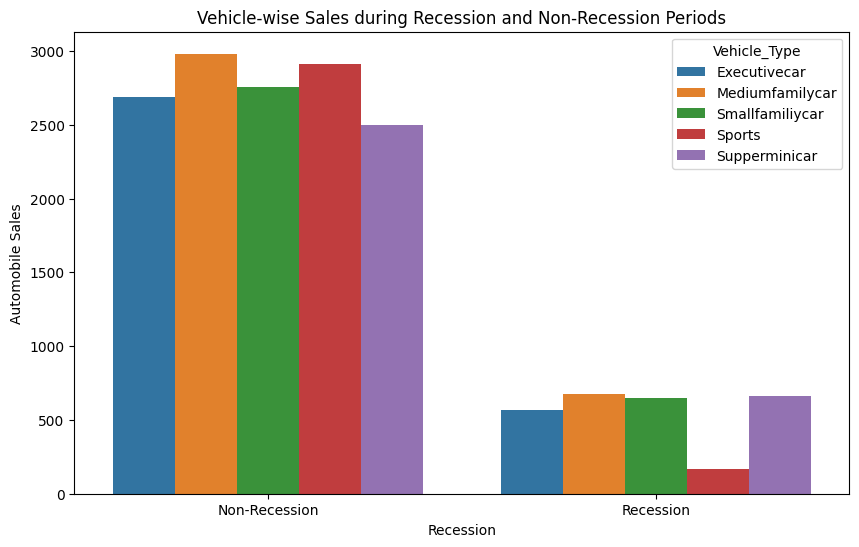

In [ ]:
rec_data = df[df['Recession']==1]
dd=df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
sales_by_vehicle_type = rec_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', data=dd, hue='Vehicle_Type')
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Vehicle-wise Sales during Recession and Non-Recession Periods')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.show()


Inference = From this plot, we can see that there is a drastic decline in the overall sale of automobiles during recession. However, the most affected type of vehicle is 'sports'

**TASK 1.4**: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

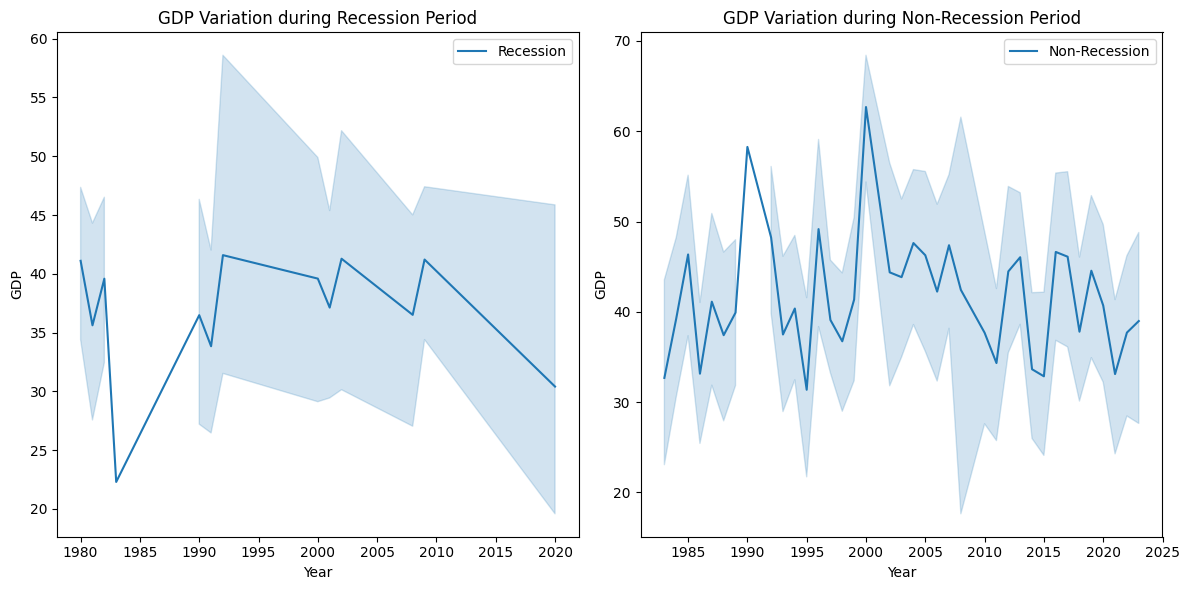

In [ ]:
# Creating Dataframes for recession and non-recession periods
rec_data = df[df['Recession']==1]
non_rec_data = df[df['Recession']==0]

#Figure
fig=plt.figure(figsize=(12,6))

# Creating axes for subplotting
ax0=fig.add_subplot(1,2,1) # subplot 1 (1-row, 2-column, 1st plot)
ax1=fig.add_subplot(1,2,2) # subplot 2 (1-row, 2-column, 2nd plot)

#plt.subplot(1,2,1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# plt.subplot(1,2,2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()


Inference = From this plot, it is evident that during recession, the GDP of the country was in a low range which may have affected the overall sales of the company

**TASK 1.5**: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

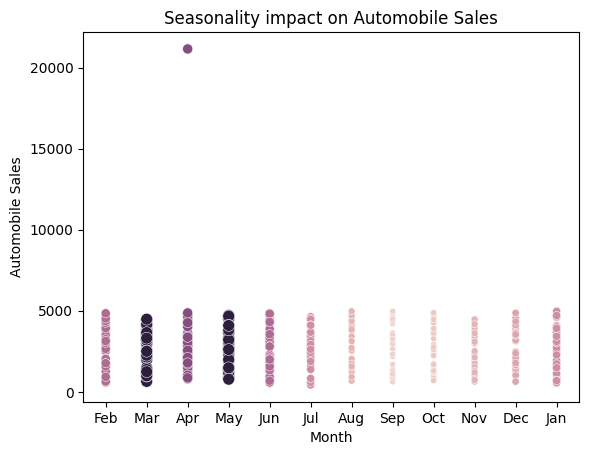

In [ ]:
non_rec_data = df[df['Recession']==0]
size = non_rec_data['Seasonality_Weight'] # for bubble effect
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', hue='Seasonality_Weight', legend=False, size=size)
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

Inference = From this graph, it can be noted that seasonality does not effect the overall sales. However, it can also be seen that during the month of April, there was a drastic raise in sales

**TASK 1.6:** Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

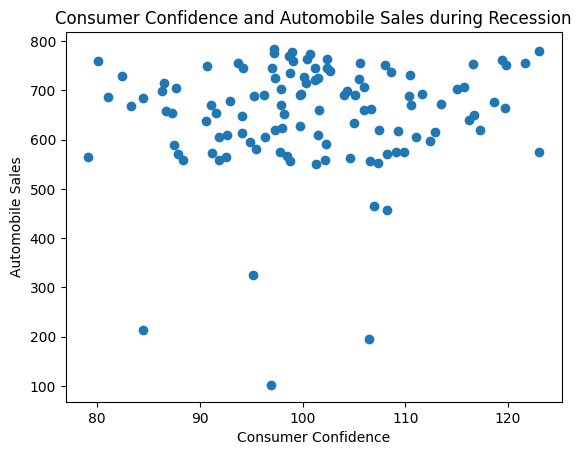

In [ ]:
# From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?
rec_data = df[df['Recession']==1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.title('Consumer Confidence and Automobile Sales during Recession')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.show()

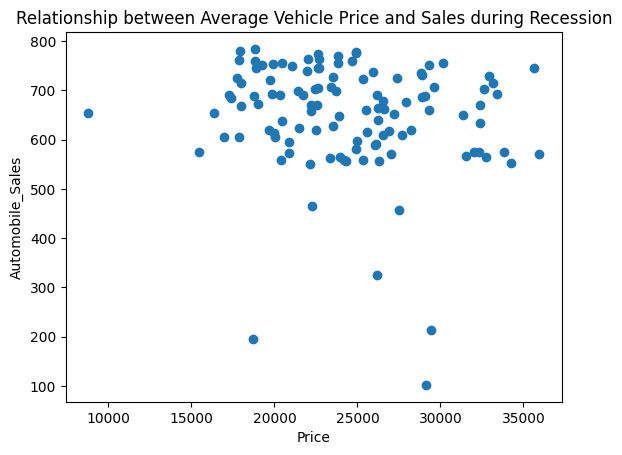

In [ ]:
# How does the average vehicle price relate to the sales volume during recessions?
rec_data = df[df['Recession']==1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.title('Relationship between Average Vehicle Price and Sales during Recession')
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.show()

Inference = There is not much relationship between the variables

**TASK 1.7:** Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

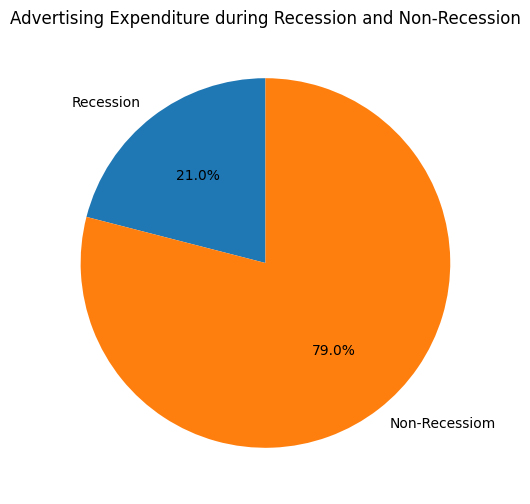

In [ ]:
rdata = df[df['Recession']==1]
ratotal = rdata['Advertising_Expenditure'].sum()

nrdata = df[df['Recession']==0]
nratotal = nrdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8,6))
labels=['Recession', 'Non-Recessiom']
sizes = [ratotal, nratotal]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession')
plt.show()

Inference = From the above pie chart, it can be noted that the company is spending more on advertisements during non-recession periods as compared to recession periods.

**TASK 1.8:** Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

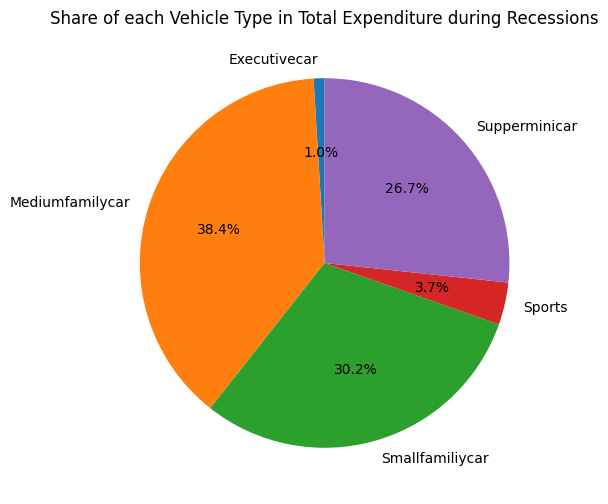

In [ ]:
rdata = df[df['Recession']==1]
vtexp = rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(10,6))
labels= vtexp.index
sizes= vtexp.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of each Vehicle Type in Total Expenditure during Recessions')
plt.show()

Inference = During recession, the advertisements were mostly focused on low-price range vehicles

**TASK 1.9:** Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

<ipython-input-82-a5bdcf19a785>:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)


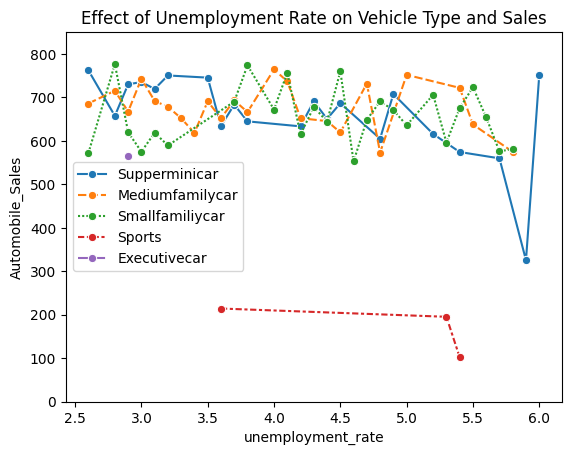

In [ ]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend()
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.show()

Inference = During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar



**2. Creating Dashboard with Plotly and Dash**

In [41]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

year_list = [i for i in range(1980, 2024, 1)]
## Task 2.1 - Create a Dash Application and give it a meaningful title
# Create app
app = dash.Dash(__name__)
# Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

# Read data into dataframe
data = pd.read_csv(URL)

#Layout Section of Dash
app.layout = html.Div(children = [html.H1('Automobile Sales Statistics Dashboard',
                                          style = {'textalign':'center',
                                                   'color':'#503D36',
                                                   'font-size':24}),

## TASK 2.2: Add drop-down menus to your dashboard with appropriate titles and options

                                    html.Div([html.H2('Select Report-Type', style={'margin-right':'2em'}),
                                              dcc.Dropdown(id='dropdown-statistics',
                                                     options= [{'label':'Yearly Statistics', 'value':'Yearly Statistics'},
                                                               {'label':'Recession Period Statistics', 'value':'Recession Period Statistics'}],
                                                     placeholder='Select a report type', value='Select Statistics',
                                                     style={'width':'80%',
                                                            'padding':'3px',
                                                            'font-size':'20px',
                                                            'textalignlast':'center'})]),
                                    html.Div([html.H2('Select Year', style={'margin-right':'2em'}),
                                              dcc.Dropdown(id='select-year',
                                                           options=[{'label':i, 'value':i } for i in year_list],
                                                           placeholder='Select-year',
                                                           value='Select-year',
                                                           style={'width':'80%',
                                                                  'padding':'3px',
                                                                  'font-size':'20px',
                                                                  'textalignlast':'center'})]),
## TASK 2.3: Add a division for output display with appropriate id and classname property
                                    html.Div([html.Div(id='output-container', className='chart-grid', style={'display':'flex'})])

])

## TASK 2.4: Creating Callbacks; Define the callback function to update the input container based on the selected statistics and the output container
# Callback Definition
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value'))

# Callback function
def update_input_container(selected_statistics):
  if selected_statistics == 'Yearly Statistics':
    return False
  else:
    return True

@app.callback(
    Output(component_id='output-container', component_property='children'),
     [Input(component_id='dropdown-statistics', component_property='value'),
      Input(component_id='select-year', component_property='value')])

def update_output_container(selected_statistics, input_year):
  if selected_statistics == 'Recession Period Statistics':
    recession_data = data[data['Recession']==1]

## TASK 2.5: Create and display graphs for Recession Report Statistics
# Plot 1 Automobile sales fluctuate over Recession Period (year wise) using line chart
    # grouping data for plotting
    yrly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
    # Plotting the line graph
    r_chart1 = dcc.Graph(figure=px.line(yrly_rec, x='Year', y='Automobile_Sales',
                                     title='Automobile sales fluctuate over Recession Period'))

#Plot 2 Calculate the average number of vehicles sold by vehicle type and represent as a Bar chart
 # use groupby to create relevant data for plotting.
 #Hint:Use Vehicle_Type and Automobile_Sales columns
    average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
    r_chart2 = dcc.Graph(figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales',
                                       title='Average Sales of Vehicles sold by Type'))

# Plot 3 : Pie chart for total expenditure share by vehicle type during recessions
            # grouping data for plotting
            # Hint:Use Vehicle_Type and Advertising_Expenditure columns
    exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    r_chart3 = dcc.Graph(figure=px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type', title='Total Expenditure by Vehicle Type during Recession'))

# Plot 4 Develop a Bar chart for the effect of unemployment rate on vehicle type and sales
       #grouping data for plotting
       # Hint:Use unemployment_rate,Vehicle_Type and Automobile_Sales columns
    unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
    r_chart4 = dcc.Graph(figure=px.bar(unemp_data, x='unemployment_rate', y='Automobile_Sales', color='Vehicle_Type',
                                       labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
                                       title='Effect of Unemployment Rate on Vehicle Type and Sales'))
    return [
        html.Div(className='chart-item', children=[html.Div(children=r_chart1), html.Div(children=r_chart2)], style={'display': 'flex'}),
        html.Div(className='chart-item', children=[html.Div(children=r_chart3), html.Div(children=r_chart4)], style={'display': 'flex'})]

# Yearly Statistic Report Plots
     # Check for Yearly Statistics.

  elif (input_year and selected_statistics=='Yearly Statistics'):
    yearly_data = data[data['Year']==input_year]

# Plot 1 :Yearly Automobile sales using line chart for the whole period.
# grouping data for plotting.
# Hint:Use the columns Year and Automobile_Sales.
    yas =data.groupby('Year')['Automobile_Sales'].mean().reset_index()
    y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales',
                                        title = 'Yearly Automobile Sales'))

# Plot 2 :Total Monthly Automobile sales using line chart.
# grouping data for plotting.
# Hint:Use the columns Month and Automobile_Sales.
    mas = data.groupby('Month')['Automobile_Sales'].mean().reset_index()
    y_chart2 = dcc.Graph(figure=px.line(mas, x='Month', y='Automobile_Sales',
                                        title='Total Monthly Automobile Sales'))

# Plot bar chart for average number of vehicles sold during the given year
# grouping data for plotting.
# Hint:Use the columns Year and Automobile_Sales
    avr_vdata = yearly_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
    y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
                                       title='Average Vehicle Sold by Vehicle Type in the year {}'.format(input_year)))

# Plot 4 Total Advertisement Expenditure for each vehicle using pie chart
# grouping data for plotting.
# Hint:Use the columns Vehicle_Type and Advertising_Expenditure
    exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type',
                                       title='Total Expenditure for each Vehicle'))

    return [
        html.Div(className='chart-item', children=[html.Div(children=y_chart1), html.Div(children=y_chart2)],style={'display':'flex'}),
        html.Div(className='chart-item', children=[html.Div(children=y_chart3), html.Div(children=y_chart4)],style={'display': 'flex'})]

if __name__ == '__main__':
  app.run_server()


<IPython.core.display.Javascript object>

In [39]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

year_list = [i for i in range(1980, 2024, 1)]
## Task 2.1 - Create a Dash Application and give it a meaningful title
# Create app
app = dash.Dash(__name__)
# Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

# Read data into dataframe
data = pd.read_csv(URL)

#Layout Section of Dash
app.layout = html.Div(children = [html.H1('Automobile Sales Statistics Dashboard',
                                          style = {'textalign':'center',
                                                   'color':'#503D36',
                                                   'font-size':24}),

## TASK 2.2: Add drop-down menus to your dashboard with appropriate titles and options

                                    html.Div([html.H2('Select Report-Type', style={'margin-right':'2em'}),
                                              dcc.Dropdown(id='dropdown-statistics',
                                                     options= [{'label':'Yearly Statistics', 'value':'Yearly Statistics'},
                                                               {'label':'Recession Period Statistics', 'value':'Recession Period Statistics'}],
                                                     placeholder='Select a report type', value='Select Statistics',
                                                     style={'width':'80%',
                                                            'padding':'3px',
                                                            'font-size':'20px',
                                                            'textalignlast':'center'})]),
                                    html.Div([html.H2('Select Year', style={'margin-right':'2em'}),
                                              dcc.Dropdown(id='select-year',
                                                           options=[{'label':i, 'value':i } for i in year_list],
                                                           placeholder='Select-year',
                                                           value='Select-year',
                                                           style={'width':'80%',
                                                                  'padding':'3px',
                                                                  'font-size':'20px',
                                                                  'textalignlast':'center'})]),
## TASK 2.3: Add a division for output display with appropriate id and classname property
                                    html.Div([html.Div(id='output-container', className='chart-grid', style={'display':'flex'})])

])

## TASK 2.4: Creating Callbacks; Define the callback function to update the input container based on the selected statistics and the output container
# Callback Definition
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value'))

# Callback function
def update_input_container(selected_statistics):
  if selected_statistics == 'Yearly Statistics':
    return False
  else:
    return True

@app.callback(
    Output(component_id='output-container', component_property='children'),
     [Input(component_id='dropdown-statistics', component_property='value'),
      Input(component_id='select-year', component_property='value')])

def update_output_container(selected_statistics, input_year):
  if selected_statistics == 'Recession Period Statistics':
    recession_data = data[data['Recession']==1]

## TASK 2.5: Create and display graphs for Recession Report Statistics
# Plot 1 Automobile sales fluctuate over Recession Period (year wise) using line chart
    # grouping data for plotting
    yrly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
    # Plotting the line graph
    r_chart1 = dcc.Graph(figure=px.line(yrly_rec, x='Year', y='Automobile_Sales',
                                     title='Automobile sales fluctuate over Recession Period'))

#Plot 2 Calculate the average number of vehicles sold by vehicle type and represent as a Bar chart
 # use groupby to create relevant data for plotting.
 #Hint:Use Vehicle_Type and Automobile_Sales columns
    average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
    r_chart2 = dcc.Graph(figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales',
                                       title='Average Sales of Vehicles sold by Type'))

# Plot 3 : Pie chart for total expenditure share by vehicle type during recessions
            # grouping data for plotting
            # Hint:Use Vehicle_Type and Advertising_Expenditure columns
    exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    r_chart3 = dcc.Graph(figure=px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type', title='Total Expenditure by Vehicle Type during Recession'))

# Plot 4 Develop a Bar chart for the effect of unemployment rate on vehicle type and sales
       #grouping data for plotting
       # Hint:Use unemployment_rate,Vehicle_Type and Automobile_Sales columns
    unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
    r_chart4 = dcc.Graph(figure=px.bar(unemp_data, x='unemployment_rate', y='Automobile_Sales', color='Vehicle_Type',
                                       labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
                                       title='Effect of Unemployment Rate on Vehicle Type and Sales'))
    return [
        html.Div(className='chart-item', children=[html.Div(children=r_chart1), html.Div(children=r_chart2)], style={'display': 'flex'}),
        html.Div(className='chart-item', children=[html.Div(children=r_chart3), html.Div(children=r_chart4)], style={'display': 'flex'})]

# Yearly Statistic Report Plots
     # Check for Yearly Statistics.

  elif (input_year and selected_statistics=='Yearly Statistics'):
    yearly_data = data[data['Year']==input_year]

# Plot 1 :Yearly Automobile sales using line chart for the whole period.
# grouping data for plotting.
# Hint:Use the columns Year and Automobile_Sales.
    yas =data.groupby('Year')['Automobile_Sales'].mean().reset_index()
    y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales',
                                        title = 'Yearly Automobile Sales'))

# Plot 2 :Total Monthly Automobile sales using line chart.
# grouping data for plotting.
# Hint:Use the columns Month and Automobile_Sales.
    mas = data.groupby('Month')['Automobile_Sales'].mean().reset_index()
    y_chart2 = dcc.Graph(figure=px.line(mas, x='Month', y='Automobile_Sales',
                                        title='Total Monthly Automobile Sales'))

# Plot bar chart for average number of vehicles sold during the given year
# grouping data for plotting.
# Hint:Use the columns Year and Automobile_Sales
    avr_vdata = yearly_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
    y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
                                       title='Average Vehicle Sold by Vehicle Type in the year {}'.format(input_year)))

# Plot 4 Total Advertisement Expenditure for each vehicle using pie chart
# grouping data for plotting.
# Hint:Use the columns Vehicle_Type and Advertising_Expenditure
    exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type',
                                       title='Total Expenditure for each Vehicle'))

    return [
        html.Div(className='chart-item', children=[html.Div(children=y_chart1), html.Div(children=y_chart2)],style={'display':'flex'}),
        html.Div(className='chart-item', children=[html.Div(children=y_chart3), html.Div(children=y_chart4)],style={'display': 'flex'})]

if __name__ == '__main__':
  app.run_server()


<IPython.core.display.Javascript object>